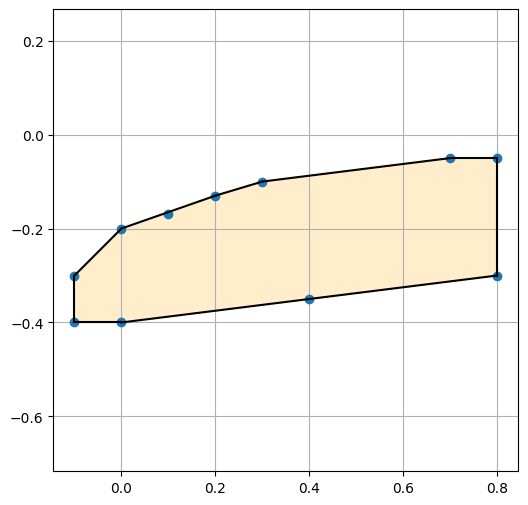

In [2]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

# List of 2D points
feasible_points_bis = [
    (-0.1,-0.3),
    (-0.1, -0.4),
    (0.0, -0.4),
    (0.0, -0.2),
    (0.1, -0.17),
    (0.2, -0.13),
    (0.3,-0.1),
    (0.7, -0.05),
    (0.8, -0.05),
    (0.8, -0.3),
    (0.4,-0.35)
]

points = np.array(feasible_points_bis)

# Compute convex hull
hull = ConvexHull(points)

plt.figure(figsize=(6,6))
plt.plot(points[:,0], points[:,1], 'o', label='Points')

# Plot convex hull as a closed polygon
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
# Optionally, fill the convex hull
plt.fill(points[hull.vertices,0], points[hull.vertices,1], alpha=0.2, color='orange', label='Convex hull')
plt.grid(True)

# Set equal scaling for both axes
plt.axis('equal')
plt.savefig('convex_hull.png')
plt.show()

In [8]:
right_foot_polytope = [
    (x[0], -x[1]) for x in feasible_points_bis
]
right_foot_polytope

[(-0.1, 0.3),
 (-0.1, 0.4),
 (0.0, 0.4),
 (0.0, 0.2),
 (0.1, 0.17),
 (0.2, 0.13),
 (0.3, 0.1),
 (0.7, 0.05),
 (0.8, 0.05),
 (0.8, 0.3),
 (0.4, 0.35)]

In [7]:
import cvxpy as cp

# Build half-space representation A u <= b from hull equations
# ConvexHull gives rows [a, b, c] meaning a*x + b*y + c = 0 on each facet with interior where <= 0
A = hull.equations[:, :2]
b = -hull.equations[:, 2]

# Example QP: find the point in the hull closest to a target
u = cp.Variable(2)
target = np.array([0.6, -0.25])
objective = cp.Minimize(cp.sum_squares(u - target))
constraints = [A @ u <= b]  # enforce u inside convex hull
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.OSQP)

print(f"Status: {prob.status}")
print(f"Optimal u: {u.value}")
print(f"Target: {target}")


Status: optimal
Optimal u: [ 0.6  -0.25]
Target: [ 0.6  -0.25]
